##Model suggestions from Dr. Bengfort 
1) Stick with support vector machines and logistic regression
2) Gaussian Naïve Bayes if features are normally distributed
3) Multinomial naïve bayes if not normally distributed
4) Bayesian classifiers are going to perform the worst – this can be are baseline
5) stick with support vector machines and logistic regression to preserve the linearity of the features  in an understandable way (natural binary classifiers)
6) if svc is taking too long then recommend just using Stochastic Gradient Descent or Linear SVC - should improve the performance of the support vector machine and when you are working with support vector machine, make sure your trying polynomial kernels in addition to linear kernels
7 ) Don’t know if you would get good results from Random Forest and K Near Neighbors, Gradient Boosting – might want to try them 
8) Ada boost
9) Smote yellowbrick.target class balance
10)Filter down zero
11) parrell functions

In [1]:
import pandas as pd
import boto3
from s3 import get_file

In [2]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [3]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',rename_file = 'master_train_playlist.csv'))
test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'test.csv'))


In [64]:
#Sort columns to be alphabetical order

df_train = train_data.reindex(sorted(train_data.columns), axis=1)
df_test = test_data.reindex(sorted(test_data.columns), axis=1)

In [65]:
df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

## Pipeline

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


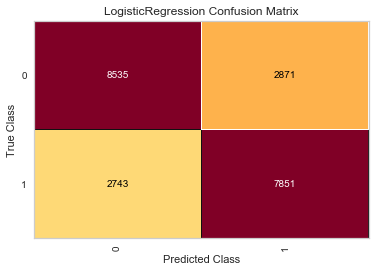

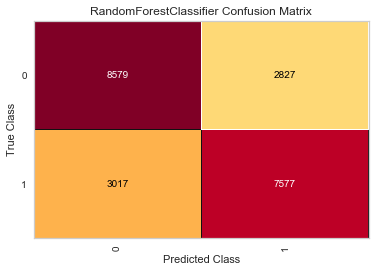

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


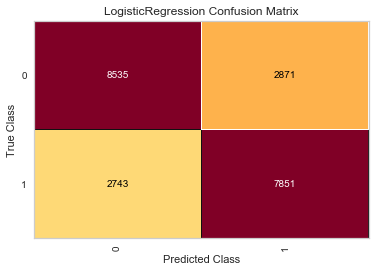

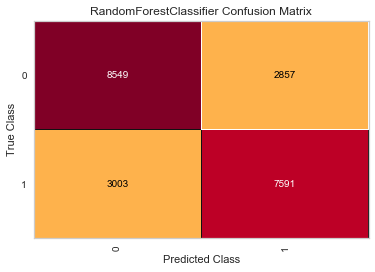

In [98]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split as tts

from yellowbrick.classifier import confusion_matrix,classification_report

from sklearn.metrics import precision_recall_fscore_support

X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = tts(StandardScaler().fit_transform(X),y, test_size=0.2)


models = [
    Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
    ]),
    Pipeline([
            ('std',StandardScaler()),
            ('reg',RandomForestClassifier(n_estimators=50))
    ]),
    
    
    Pipeline([
            ('std',RobustScaler()),
            ('reg',LogisticRegression())
    ]),
    Pipeline([
            ('std',RobustScaler()),
            ('reg',RandomForestClassifier(n_estimators=50))
    ]),
]

for model in models:
    model.fit(X_train,y_train)
    _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
    

## Stop

## Logistical Regression

In [60]:
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X),y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

_ = confusion_matrix(model, X_test, y_test,is_fitted=True)


#confusion_matrix(X_train, y_train)


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: confusion_matrix() got an unexpected keyword argument 'is_fitted'

22000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

In [49]:
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

#Cross
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print(clf.predict)






#confusion_matrix(logreg, X_train, y_train, X_test, y_test)


<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>


In [61]:
scores = cross_val_score(clf,X,y)

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


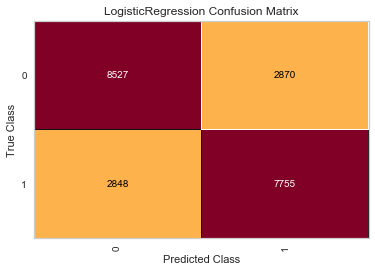

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x11ed03fd0>,
        classes=None,
        cmap=<matplotlib.colors.ListedColormap object at 0x11e619110>,
        encoder=None, fontsize=None, force_model=False, is_fitted='auto',
        model=None, percent=False, sample_weight=None)

In [21]:
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']
logreg = LogisticRegression()


#Cross
X_train, X_test, y_train, y_test = train_test_split(RobustScaler().fit_transform(X), y, test_size=0.2)
confusion_matrix(logreg, X_train, y_train, X_test, y_test)



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report



#RandomForestRegressor(n_estimators = 50)



#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(X)
#enc.categories_


#Support Vector Machine
#estimator = svm.SVC(gamma=.001#,kernel='linear',C=100)

#confusion_matrix(estimator, *train_test_split(X, y, test_size=0.2))
#scores = cross_val_score(estimator,X,y)
#estimator.fit(X,y)
#estimator.predict(df_test)
#Cross value scores
#cross_val_score(X,y)


fromsklearn.neighborsimport KNeighborsClassifierfromsklearn.preprocessingimport StandardScalerfromsklearn.imputeimport SimpleImputerfromsklearn.pipelineimport Pipelinemodel = Pipeline([    ('impute', SimpleImputer(strategy='mean')),     ('scale', StandardScaler()),     ('knn', KNeighborsClassifier(n_neighbors=12))])# Update the hyperparameters of the modelmodel.set_params(knn__weights="distance")model.fit(X_train, y_train)model.score(X_test, y_test)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

model = Pipeline([('scale', StandardScaler()),
                    ('reg',LogisticRegression(fit_intercept=False))
                 ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
confusion_matrix(model.reg, X_train, y_train, X_test, y_test)

# Update the hyperparameters of the model



TypeError: 'Pipeline' object is not subscriptable

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = [Pipeline([
    ('scale', StandardScaler()),
    ('reg'),LogisticRegression(fit_intercept=False)
    ]),
]

#check_is_fitted(model,['support_fit_','support_','support_vectors_'])

confusion_matrix(logreg, X_train, y_train, X_test, y_test)

TypeError: zip argument #3 must support iteration

In [63]:
model = Pipeline([
    ('std', StandardScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', StandardScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),LogisticRegression(fit_intercept=False)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),

IndentationError: unexpected indent (<ipython-input-63-4b025d1d0f2c>, line 5)